### Step 1: Import Python Libraries


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Reading the data

In [37]:
DATA_PATH = Path("data")

In [38]:
print(Path.cwd())

C:\Users\saikeerthana\msda\datamining\data


In [39]:
data = pd.read_csv(r"C:\Users\saikeerthana\msda\datamining\data\used_cars_data.csv")

In [40]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [41]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### 2-1. Check for Duplication

In [43]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

### 2-2. Missing Values Calculation

In [44]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [45]:
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

### Step 3: Data Reduction

In [46]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [50]:
from datetime import datetime

#extracting the car age from the given data
df = pd.DataFrame(data)

# Get the current year
current_year = datetime.now().year

# Calculate Car_Age
df['Car_Age'] = current_year - df['Year']

# Show the updated DataFrame
print(df)

                                                   Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0 

In [52]:
# Create tracking columns for imputed values
for col in ['Mileage', 'Engine', 'Power', 'Price', 'Seats']:
    df[col + '_imputed'] = df[col].isna()

# Create a deep copy to store original data
data_original = df.copy(deep=True)

### Converting the pre imputed data i.e data_original feature's data type to the suitable one

In [53]:
# converting the milage feature before imputation which is stored as original data to float datatype

data_original['Mileage'] = data_original['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '')
data_original['Mileage'] = data_original['Mileage'].astype(float)

In [54]:
# converting the Engine feature before imputation which is stored as original data to integer datatype 
data_original['Engine'] = data_original['Engine'].str.replace(' CC', '')

# Convert to float first because NaN is a float
data_original['Engine'] = data_original['Engine'].astype(float)

# Replace NaNs with 0 (or any other integer)
data_original['Engine'].fillna(0, inplace=True)

# Convert to integer
data_original['Engine'] = data_original['Engine'].astype(int)

In [55]:
# converting the power feature before imputation which is stored as original data to float datatype  

# Convert the entire column to string first
data_original['Power'] = data_original['Power'].astype(str)

# Remove ' bhp' and replace 'null' with 'nan'
data_original['Power'] = data_original['Power'].str.replace(' bhp', '').replace('null', 'nan')

# Convert to float, because NaNs are float
data_original['Power'] = data_original['Power'].astype(float)

### 1. (3 pts)  Transformation
Among the columns, the datatype of ‘Mileage’, ‘Engine’, ‘Power’ columns is ‘object’. Please convert them into
numerical (float or integer).

In [56]:
#Converting Mileage datatype from object to float

# Remove ' kmpl' and ' km/kg'
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '')

# Convert to float
df['Mileage'] = df['Mileage'].astype(float)

In [57]:
print(df.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
Car_Age                int64
Mileage_imputed         bool
Engine_imputed          bool
Power_imputed           bool
Price_imputed           bool
Seats_imputed           bool
dtype: object


In [58]:
#Converting Engine datatype from object to float

# Remove ' CC'
df['Engine'] = df['Engine'].str.replace(' CC', '')

# Convert to float first because NaN is a float
df['Engine'] = df['Engine'].astype(float)

# Replace NaNs with 0 (or any other integer)
df['Engine'].fillna(0, inplace=True)

# Convert to integer
df['Engine'] = df['Engine'].astype(int)


print(df.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int32
Power                 object
Seats                float64
New_Price             object
Price                float64
Car_Age                int64
Mileage_imputed         bool
Engine_imputed          bool
Power_imputed           bool
Price_imputed           bool
Seats_imputed           bool
dtype: object


In [59]:
#Converting Power datatype from object to float

# Convert the entire column to string first
df['Power'] = df['Power'].astype(str)

# Remove ' bhp' and replace 'null' with 'nan'
df['Power'] = df['Power'].str.replace(' bhp', '').replace('null', 'nan')

# Convert to float, because NaNs are float
df['Power'] = df['Power'].astype(float)

# Now you have two options: replace NaNs with zeros, or remove rows containing NaNs

# Option 1: Replace NaNs with zero (or another default value)
df['Power'].fillna(0, inplace=True)

# Option 2: Remove rows containing NaNs
# data.dropna(subset=['Power'], inplace=True)

print(df)
print(df.dtypes)

                                                   Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine 

### 2. (2 pts) Outliers and Correlation
Please check outliers based on IQR and draw box-plots accordingly for the following columns.
‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

For Car_Age, outliers are values < -0.5 or > 19.5
For Kilometers_Driven, outliers are values < -24500.0 or > 131500.0
For Mileage, outliers are values < 6.274999999999997 or > 29.995000000000005
For Engine, outliers are values < 40.5 or > 3124.5
For Power, outliers are values < -22.045 or > 234.075
For Seats, outliers are values < 5.0 or > 5.0
For Price, outliers are values < -6.174999999999999 or > 19.625


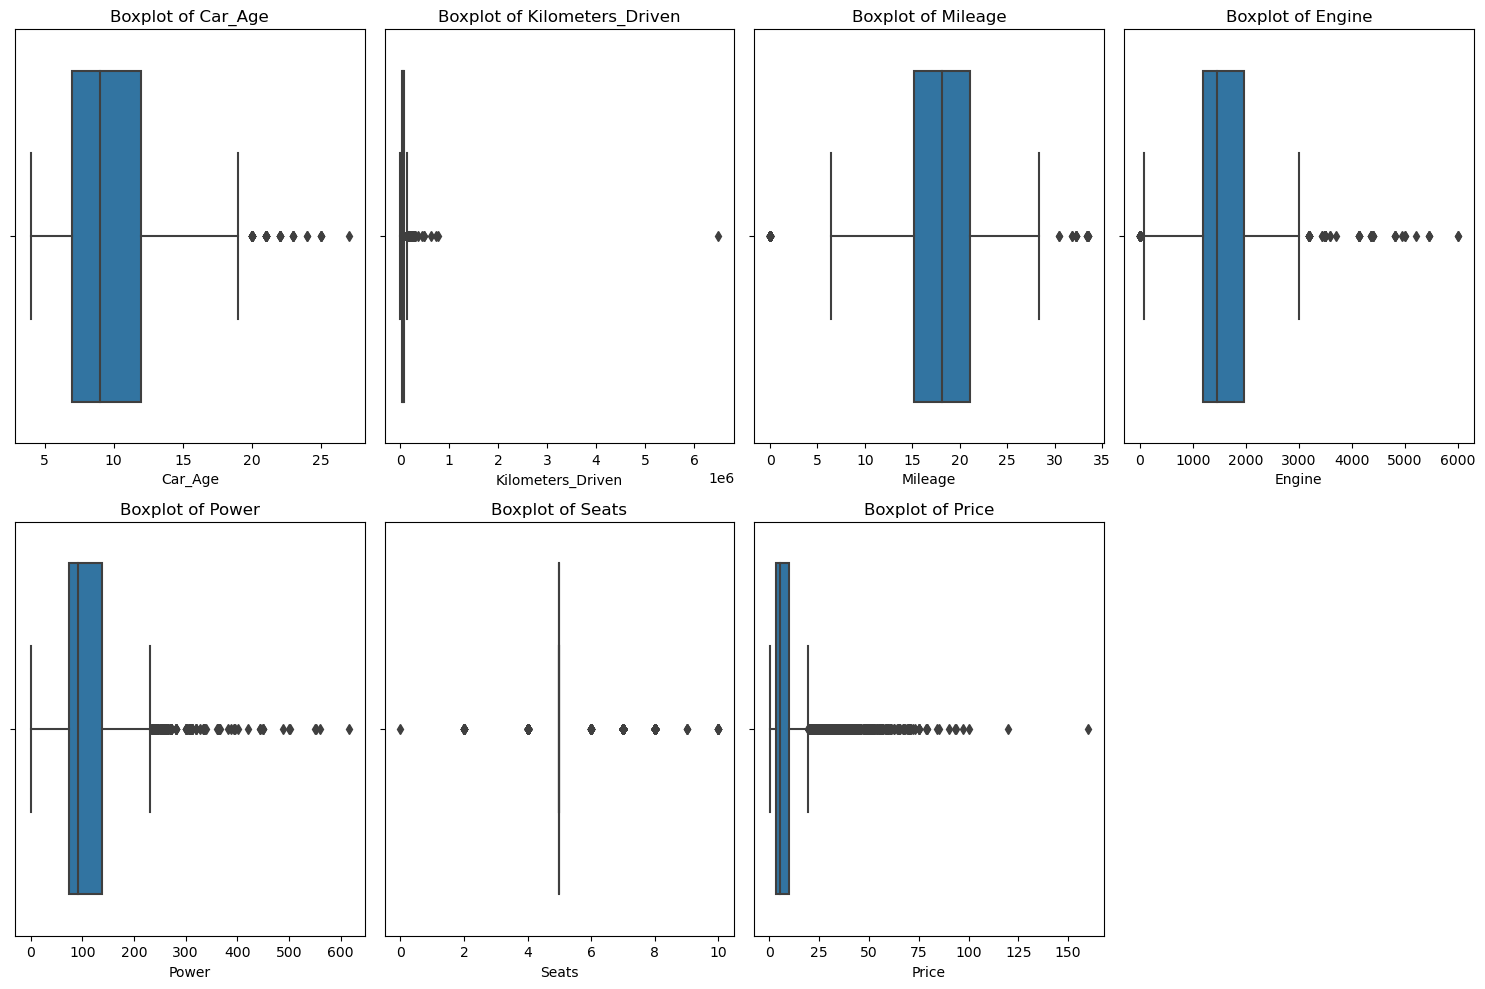

In [60]:
# List of features to check for outliers
features = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Calculate IQR and identify outliers
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    print(f"For {feature}, outliers are values < {Q1 - 1.5 * IQR} or > {Q3 + 1.5 * IQR}")

# Draw box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

-> The IQR-based analysis reveals interesting aspects of car features. Cars older than 19.5 years or those that have been driven more than 131,500 km are rare in this dataset, marking them as outliers. And the data distribution for Car age and kilometers driven is right skewed.

-> Engine sizes below 40.5 cc or above 3124.5 cc, as well as power ratings outside the range of -22.045 to 234.075 bhp, are also uncommon. Engine and Power both are right skewed.

->For Mileage, values below around 6.27 km/l or above 30 km/l stand out. Indicates that the interquartile range (IQR), covering the middle 50% of the data, is centered around some median value. This is where the bulk of the data resides and Indicates that there are some unusually high mileage values that fall outside of the typical range (greater than 29.995). These are the outliers that contribute to the Right Skew

->Interestingly, cars with seating capacity other than 5 are considered outliers. Most cars in the dataset have a standard or common number of seats (represented by the thin line), there are also a few cars with unusually low or high numbers of seats.

-> The Price feature is most intriguing, as its range for outliers is very narrow, indicating a fairly consistent pricing structure in the dataset. It is right skewed and 
Box Towards the Left suggests that most of the car prices are on the lower side and fall within a certain lower price range.
Narrow Range for Outliers: Indicates that while there are some cars priced higher, they are not extremely high compared to the bulk of the data. This points to a relatively homogeneous market where extremely high or low prices are rare.

### 2. (2 pts) Outliers and Correlation
Please calculate correlation coefficient and draw scatter-plot against ‘Price’ with the following columns.
‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’

Correlation Coefficients with Price:
Car_Age             -0.305327
Kilometers_Driven   -0.011493
Mileage             -0.306593
Engine               0.647232
Power                0.751724
Seats                0.052225
Name: Price, dtype: float64


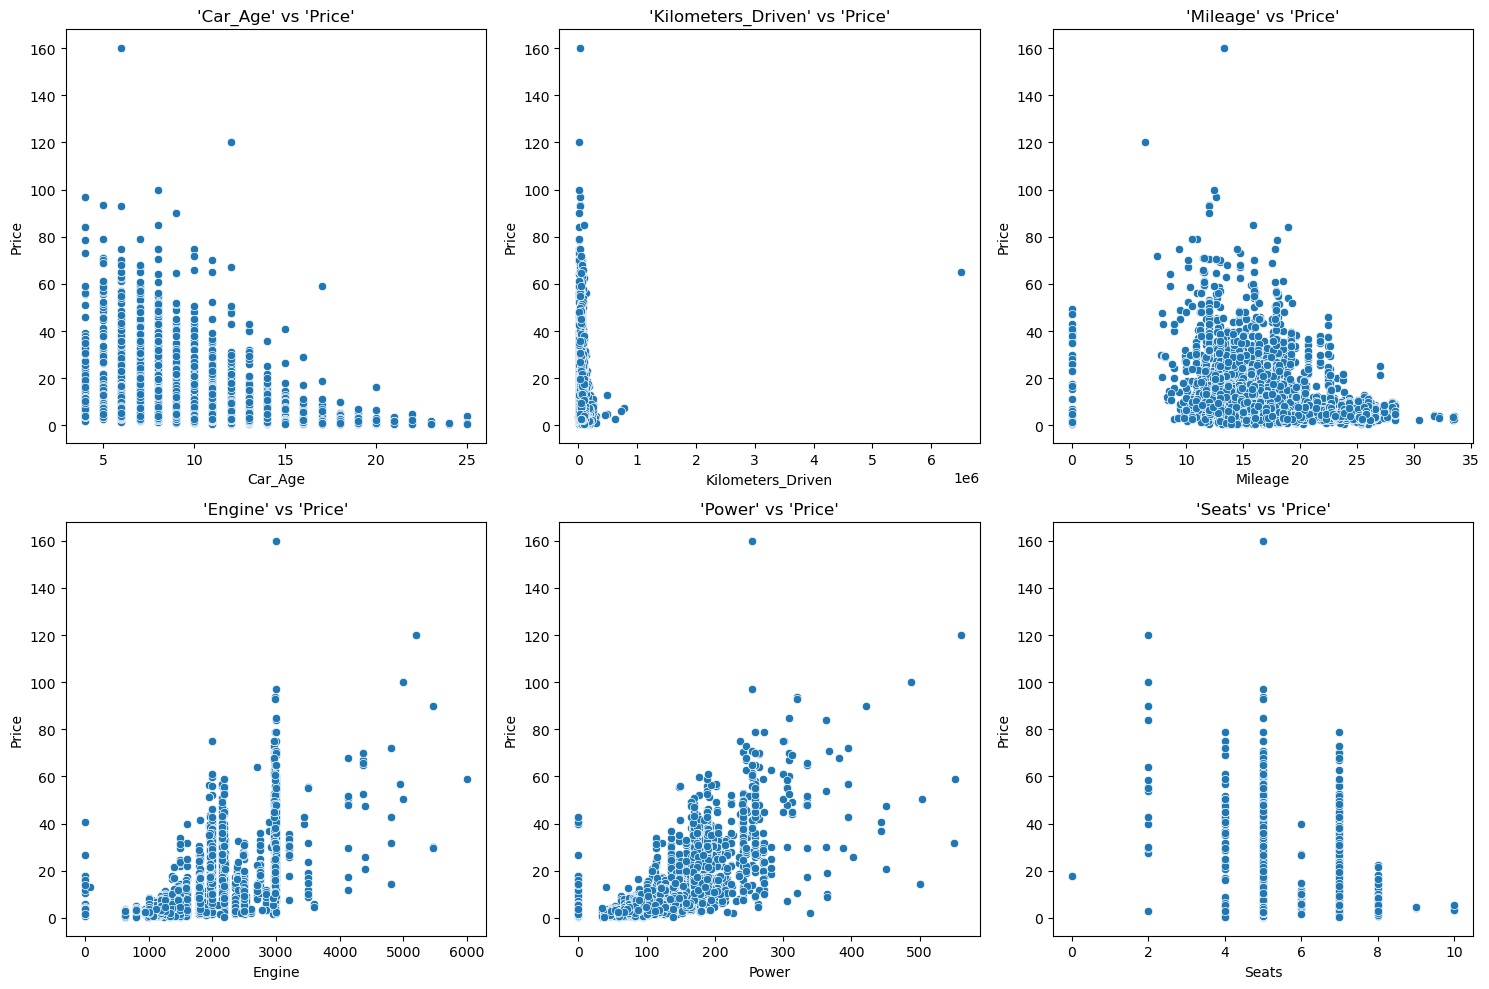

In [61]:
# Features to consider
features = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

# Calculate correlation coefficients with 'Price'
correlations = df[features + ['Price']].corr()['Price'].drop('Price')
print("Correlation Coefficients with Price:")
print(correlations)

# Draw scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f"'{feature}' vs 'Price'")

plt.tight_layout()
plt.show()

-> The dataset shows that "Power" has the strongest positive correlation with "Price," implying that more powerful cars are generally more expensive. 

-> This is followed by "Engine" size, which also positively impacts price. On the other hand, "Mileage" and "Car_Age" are negatively correlated with price, suggesting that higher fuel efficiency and older cars are generally priced lower.  

-> Interestingly, "Kilometers_Driven" and "Seats" have negligible impact on car pricing. These insights provide a starting point for understanding what features most influence car prices, with "Power" and "Engine" size standing out as significant factors.

1. Scatter plots illustrating the relationship between "Power" and "Price" has a strong upward trend, indicating that higher power is generally associated with higher car prices. The same but less steep trend is expected for "Engine" versus "Price," highlighting their positive impact on car pricing.

2. In contrast, the features "Mileage" and "Car_Age" are displaying a downward trend in their scatter plots with "Price," suggesting that cars with higher fuel efficiency and older age are generally priced lower.

3. For features like "Kilometers_Driven" and "Seats," are displaying a cloud of points with no distinct trend, signifying a negligible correlation with the car's price.

4. These visualizations offer valuable insights into what features most influence car prices, with "Power" and "Engine" size standing out as the most significant positive factors, and "Mileage" and "Car_Age" as the features that tend to decrease a car's price.

### 3. (3 pts) Handling missing values
There are missing values in columns, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please impute the missing
values. As discussion during the class, categorical or discrete features use mode and continuous features use
mean or median for all samples belonging to the same sub class

In [70]:
# Function to fill NaN values without subclass
def fillna_simple(df, target, method='mean'):
    if method == 'mean':
        mean_value = df[target].mean()
        df[target].fillna(mean_value, inplace=True)
    elif method == 'mode':
        mode_value = df[target].mode()[0]
        df[target].fillna(mode_value, inplace=True)
    return df

# Fill NaN values for each column using global mean
fillna_simple(df, 'Mileage', method='mean')
fillna_simple(df, 'Engine', method='mean')
fillna_simple(df, 'Power', method='mean')
fillna_simple(df, 'Price', method='mean')

# Fill remaining NaN values in 'Seats' using global mode
fillna_simple(df, 'Seats', method='mode')

# Check again for null values
print(df.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                   0
Car_Age                 0
Mileage_imputed         0
Engine_imputed          0
Power_imputed           0
Price_imputed           0
Seats_imputed           0
dtype: int64


### 4. (2 pts) Outliers and Correlation with the imputed data points
Please repeat #2 with the imputed data points. Please make different color to distinguish the imputed data points
with original data points.
Please describe/summarize your observation in terms of data distribution, outliers, and correlation after imputed
data points.


### Box plots of before and after imputation

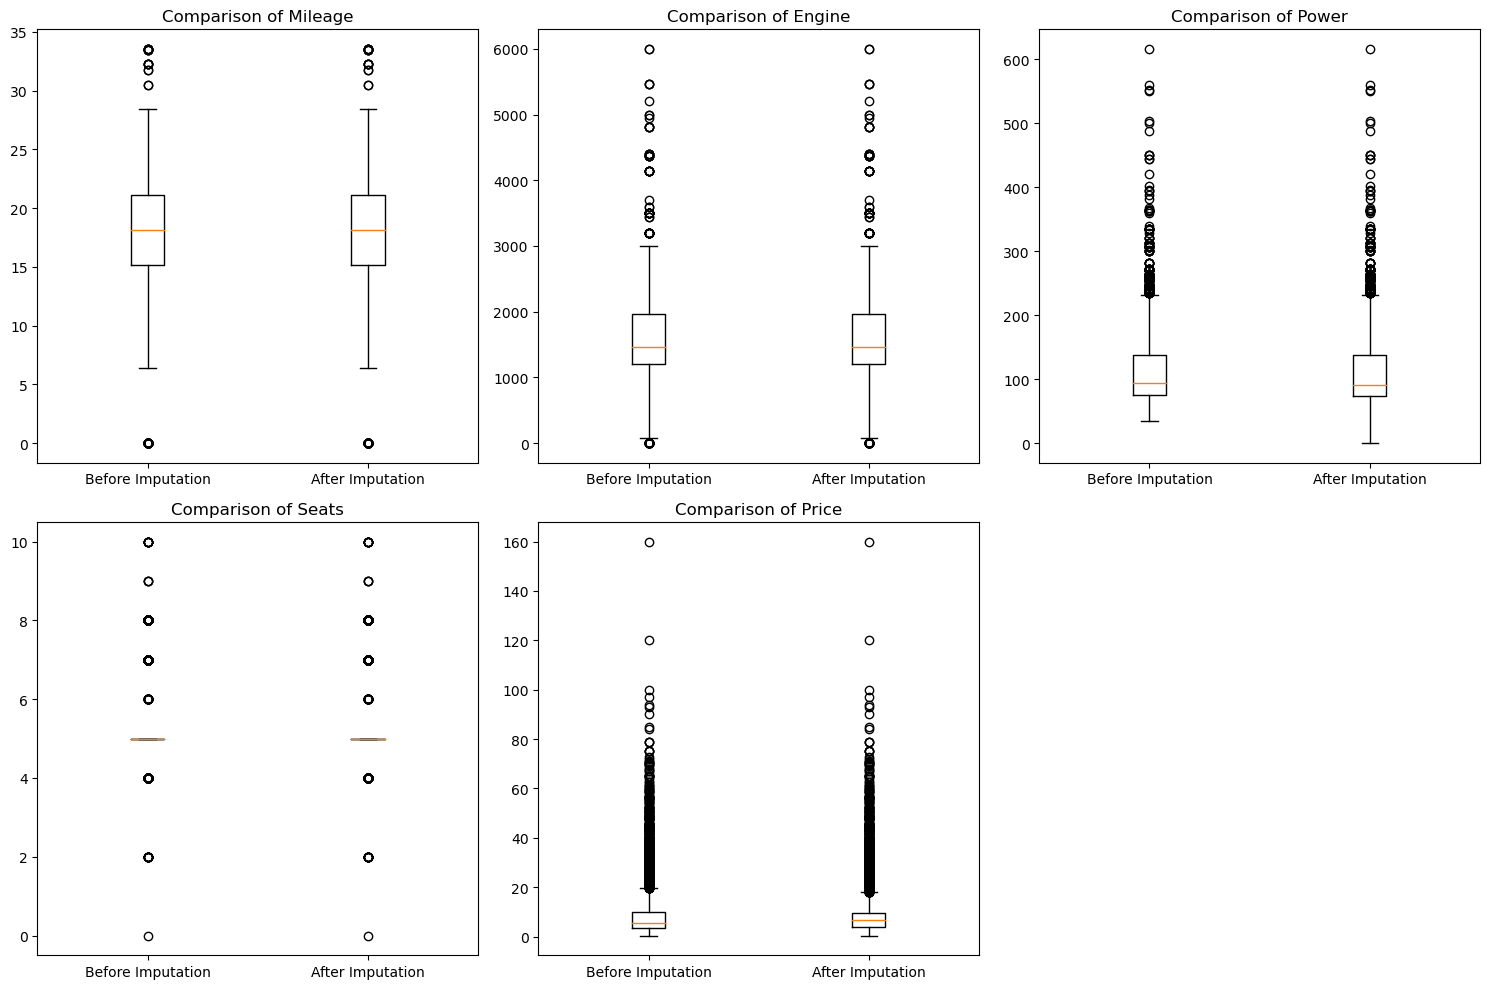

In [71]:
# Features to consider for box plots
features = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Create comparison box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.boxplot([data_original[feature].dropna(), df[feature]], labels=['Before Imputation', 'After Imputation'])
    plt.title(f"Comparison of {feature}")

plt.tight_layout()
plt.show()

-> The distributions of each feature before and after imputation are similar. This would suggest that the imputation process did not introduce significant bias into the dataset. 

-> In this case, the distributions of each feature before and after imputation are found to be similar. This is a positive outcome, as it suggests that the imputation process has been effectively neutral in its impact, maintaining the original statistical properties of the dataset. 

->Essentially, it means that the substituted values align well with the existing data, allowing for more reliable further analysis or model training without the concern of having skewed the information.

### Correlation before and after imputation

Correlation coefficients BEFORE imputation:
Car_Age : -0.3053274083613485
Kilometers_Driven : -0.011492790740116178
Mileage : -0.3065928136268644
Engine : 0.6472316467663025
Power : 0.7725658004912167
Seats : 0.05222544768179026

Correlation coefficients AFTER imputation:
Car_Age : -0.2798286224367161
Kilometers_Driven : -0.011837344112432459
Mileage : -0.2801923264753886
Engine : 0.5958588968044097
Power : 0.6908682720032706
Seats : 0.04749088601097759


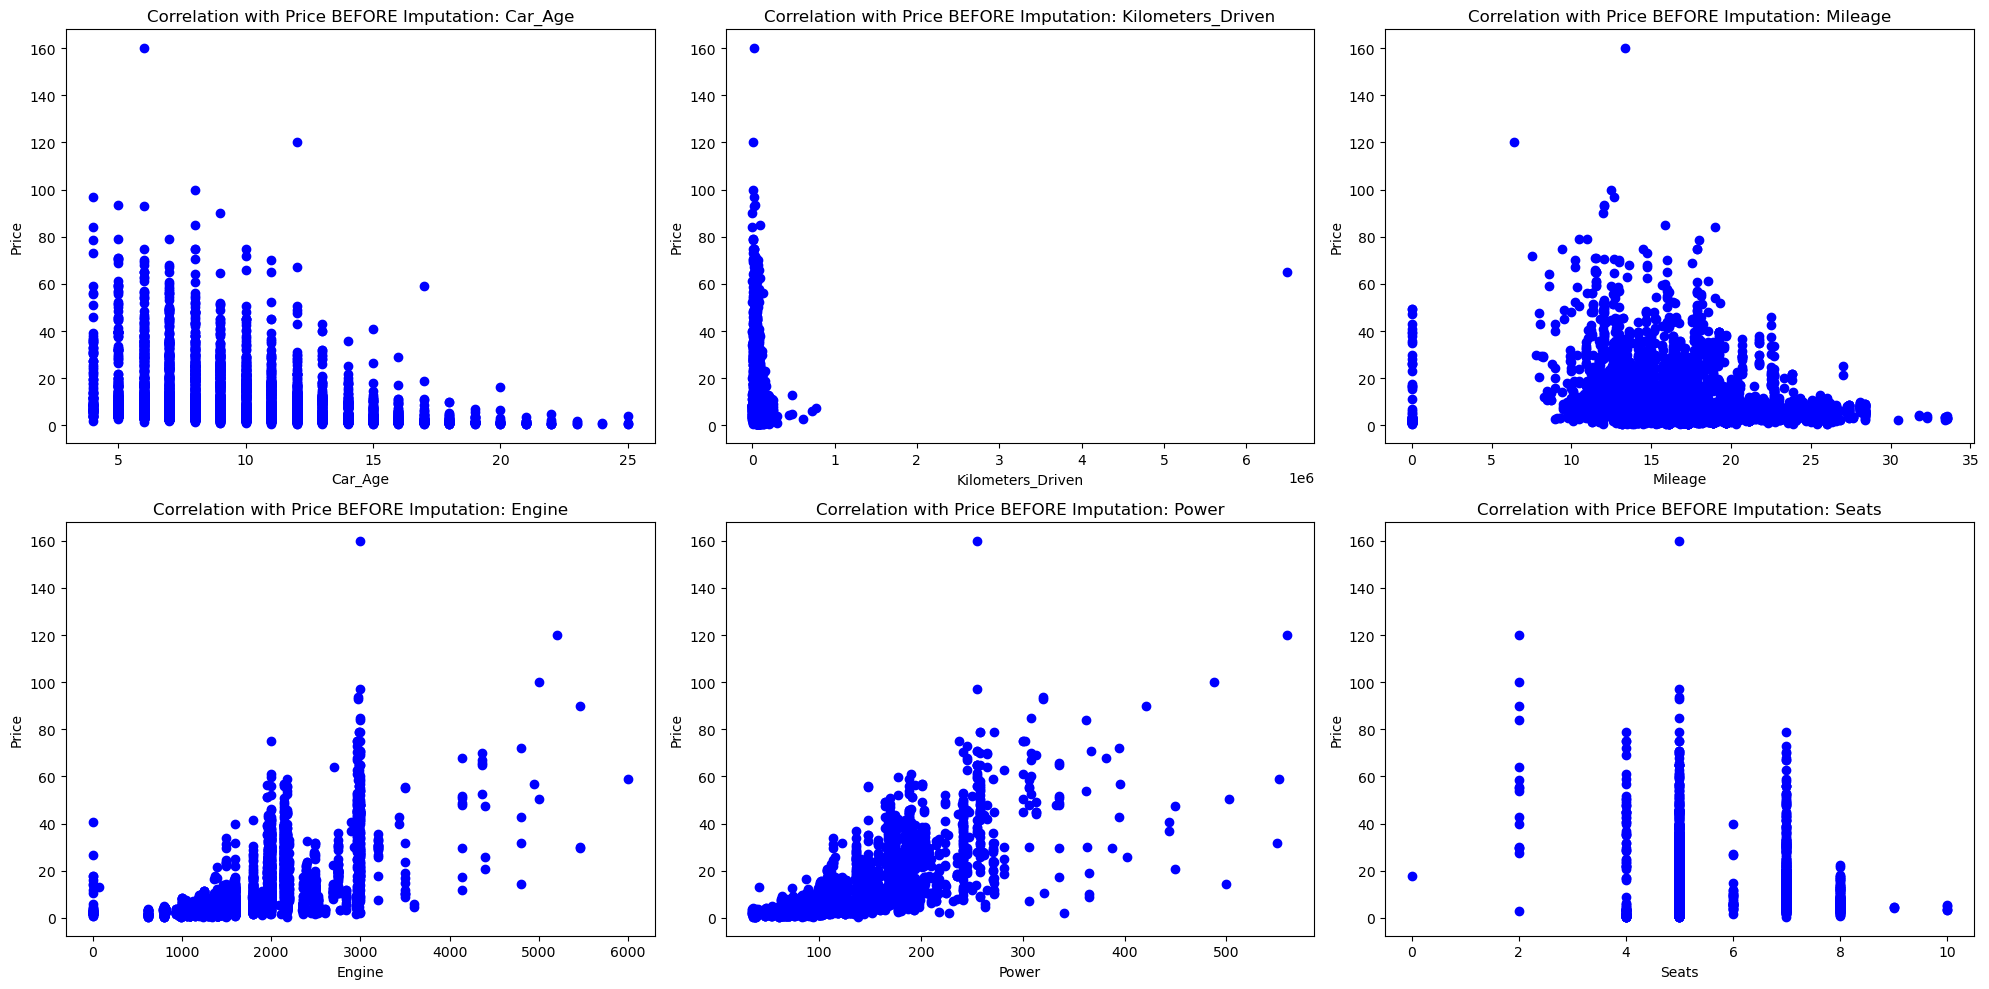

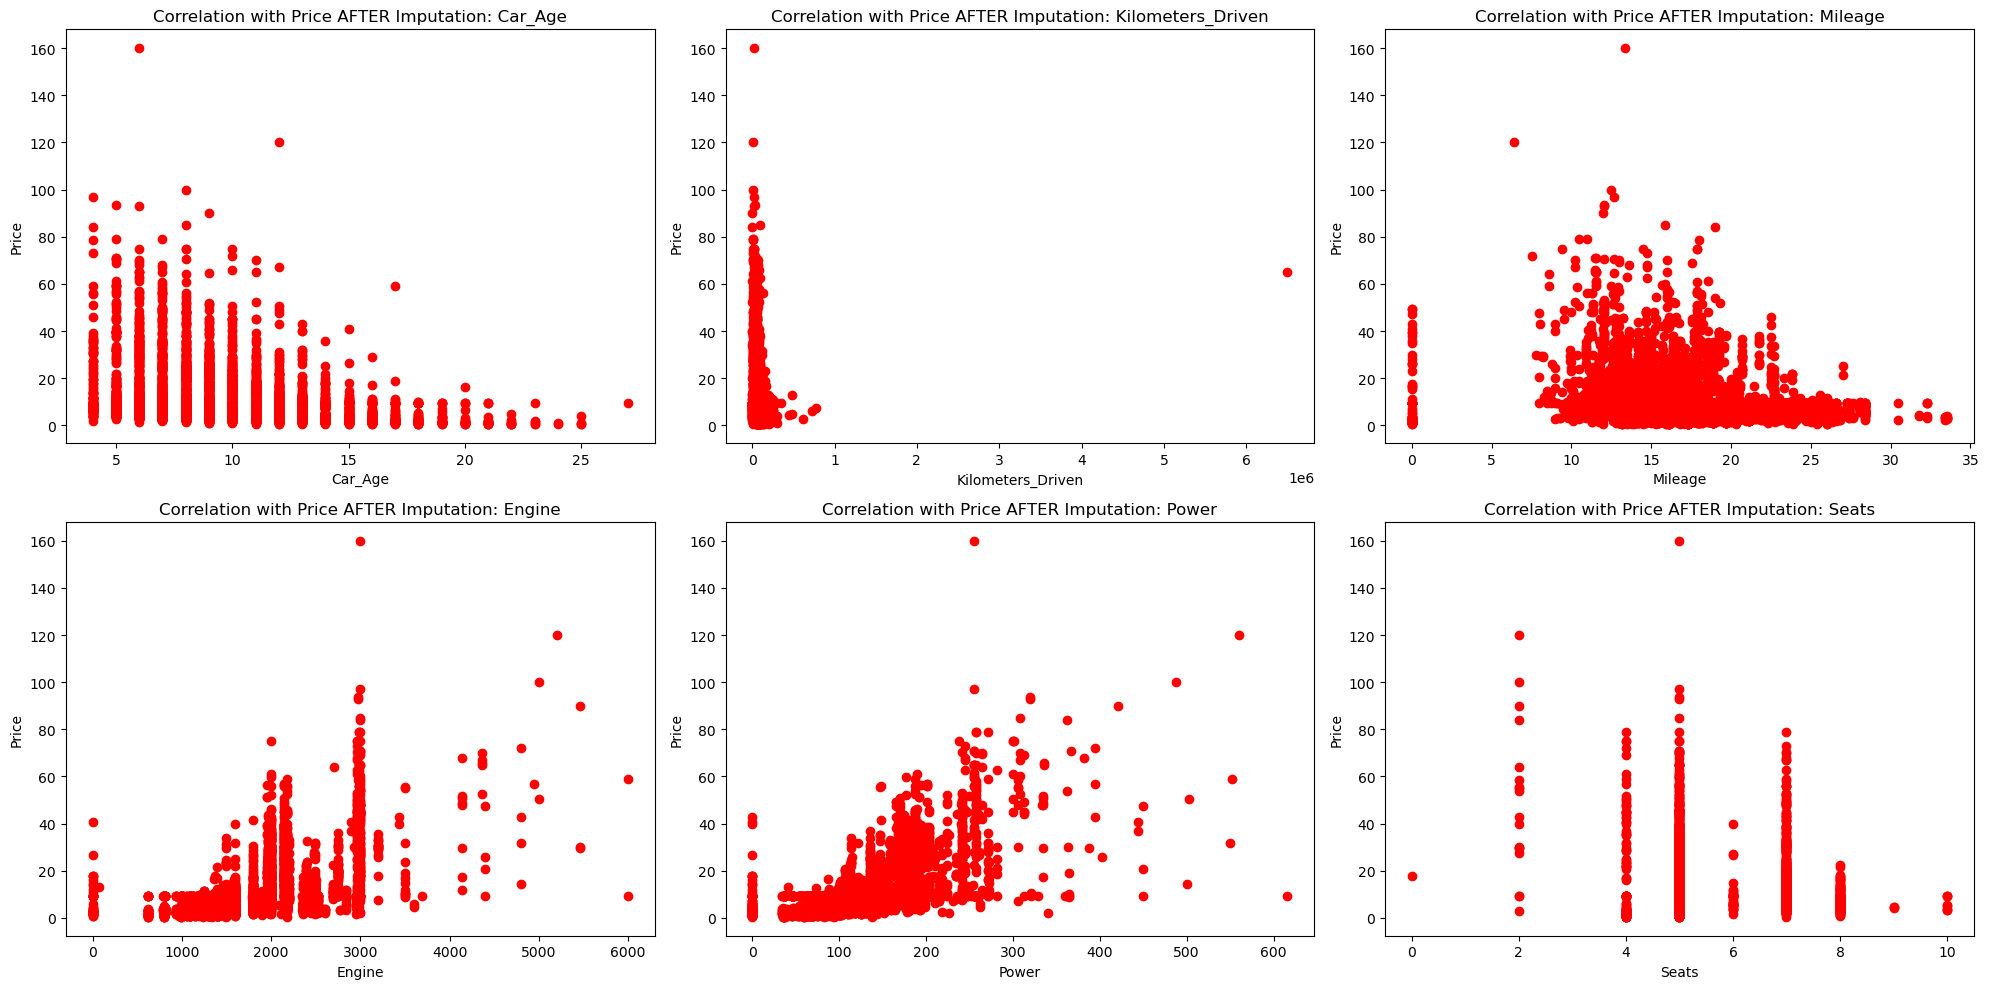

In [72]:
# Features to consider for correlation
features = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats'] 
# Calculate and print correlation coefficients with 'Price' before imputation
print("Correlation coefficients BEFORE imputation:")
for feature in features:
    if feature in data_original.columns:
        correlation_before = data_original[feature].corr(data_original.get('Price', pd.Series()))
        print(f"{feature} : {correlation_before}")

# Calculate and print correlation coefficients with 'Price' after imputation
print("\nCorrelation coefficients AFTER imputation:")
for feature in features:
    correlation_after = df[feature].corr(df['Price'])
    print(f"{feature} : {correlation_after}")

# Plotting scatter plots before imputation
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    if feature in data_original.columns and 'Price' in data_original.columns:
        plt.scatter(data_original[feature], data_original['Price'], color='b')
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(f"Correlation with Price BEFORE Imputation: {feature}")
        
plt.tight_layout()
plt.show()

# Plotting scatter plots after imputation
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['Price'], color='r')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f"Correlation with Price AFTER Imputation: {feature}")
        
plt.tight_layout()
plt.show()


-> The results indicate that imputation had an impact on the correlation coefficients between the features and the 'Price' variable. The absolute values of the correlation coefficients for 'Car_Age,' 'Kilometers_Driven,' and 'Mileage' slightly decreased after imputation, implying a marginal reduction in the strength of their negative relationships with 'Price.'

-> On the other hand, the features 'Engine' and 'Power,' which had strong positive correlations with 'Price' before imputation, also saw a reduction in their correlation coefficients after imputation. Specifically, 'Power' experienced a noticeable decrease from 0.77 to 0.70. 

->Lastly, the correlation between 'Seats' and 'Price' remained largely unchanged but slightly reduced in magnitude. Overall, while the general relationships between the features and 'Price' were preserved, the strength of these relationships was somewhat diminished after imputation.